In [41]:
import pandas as pd
import numpy as np

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [45]:
df = pd.read_csv('city_day.csv')
print("\nData types and missing values:")
df.info()


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [46]:
print("First 5 rows of dataset:")
df.head()

First 5 rows of dataset:


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [47]:
print("\nDataset shape (rows, columns):", df.shape)


Dataset shape (rows, columns): (29531, 16)


In [48]:
print("\nMissing values per column :")
df.isnull().sum()


Missing values per column :


City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [49]:
missing_percentage = df.isnull().mean() * 100
print("\nPercentage of missing values per column :")
print(missing_percentage.sort_values(ascending=False))


Percentage of missing values per column :
Xylene        61.322001
PM10          37.723071
NH3           34.973418
Toluene       27.229014
Benzene       19.041008
AQI           15.851139
AQI_Bucket    15.851139
PM2.5         15.570079
NOx           14.171549
O3            13.619586
SO2           13.050692
NO2           12.139785
NO            12.129626
CO             6.972334
Date           0.000000
City           0.000000
dtype: float64


In [50]:
# Drop Xylene column (too many missing values)
df.drop('Xylene', axis=1, inplace=True)

# Identify numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values with median for numerical columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Confirm no missing values remain
print("Remaining missing values:\n", df.isnull().sum())

Remaining missing values:
 City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64


C:\Users\MANN\AppData\Local\Temp\ipykernel_19824\2635828758.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\MANN\AppData\Local\Temp\ipykernel_19824\2635828758.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [51]:
# Recalculate correlation after filling missing values
corr = df.corr(numeric_only=True)

# Sort correlations with AQI
corr_with_aqi = corr['AQI'].sort_values(ascending=False)
print("🔹 Updated Correlation of each feature with AQI:\n")
print(corr_with_aqi)


🔹 Updated Correlation of each feature with AQI:

AQI        1.000000
CO         0.650475
PM2.5      0.633654
NO2        0.531952
SO2        0.454182
PM10       0.447686
NO         0.438039
NOx        0.436282
Toluene    0.288749
O3         0.199100
NH3        0.097916
Benzene    0.052027
Name: AQI, dtype: float64


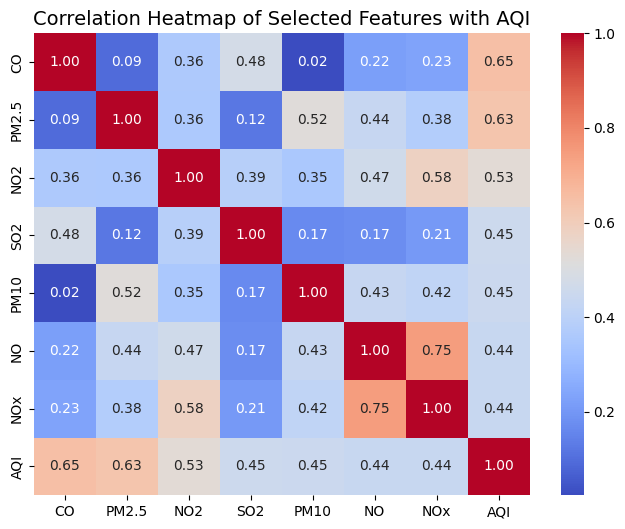

C:\Users\MANN\AppData\Local\Temp\ipykernel_19824\3652437581.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_aqi.values, y=corr_with_aqi.index, palette='viridis')


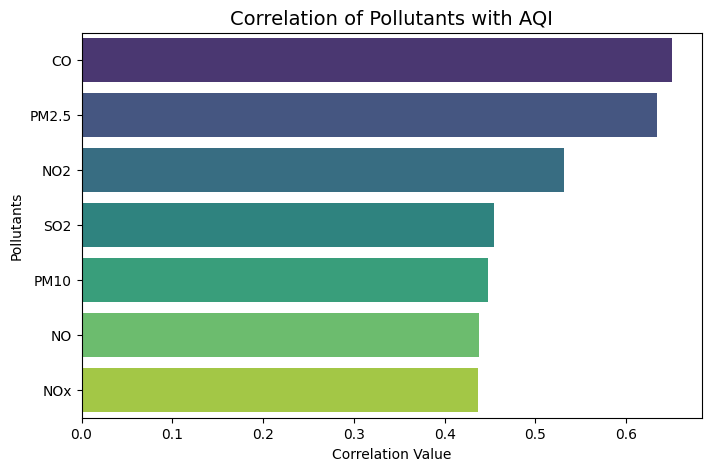

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the important columns
selected_columns = ['CO', 'PM2.5', 'NO2', 'SO2', 'PM10', 'NO', 'NOx', 'AQI']
corr = df[selected_columns].corr()

# 1️⃣ Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features with AQI', fontsize=14)
plt.show()

# 2️⃣ Bar chart of correlation with AQI
corr_with_aqi = corr['AQI'].sort_values(ascending=False)[1:]  # skip AQI itself
plt.figure(figsize=(8,5))
sns.barplot(x=corr_with_aqi.values, y=corr_with_aqi.index, palette='viridis')
plt.title('Correlation of Pollutants with AQI', fontsize=14)
plt.xlabel('Correlation Value')
plt.ylabel('Pollutants')
plt.show()


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Make a copy of dataset to work safely
data_model = df.copy()

# Encode 'City' column into numeric form
le = LabelEncoder()
data_model['City'] = le.fit_transform(data_model['City'])

# Convert 'Date' to datetime and extract useful time features
data_model['Date'] = pd.to_datetime(data_model['Date'])
data_model['Year'] = data_model['Date'].dt.year
data_model['Month'] = data_model['Date'].dt.month
data_model['Day'] = data_model['Date'].dt.day

# Drop original Date column (we extracted useful parts)
data_model.drop(columns=['Date'], inplace=True)

# Select features (independent variables)
X = data_model[['City', 'Year', 'Month', 'Day', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'NO', 'NOx']]

# Target variable
y = data_model['AQI']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✅ Data prepared successfully!")
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

✅ Data prepared successfully!
Training data shape: (20671, 11)
Testing data shape: (8860, 11)


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Convert R² to a pseudo "accuracy" (just for representation)
accuracy_lr = r2_lr * 100

print("📈 Linear Regression Results:")
print(f"R² Score: {r2_lr:.3f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.3f}")
print(f"Model Accuracy (approx): {accuracy_lr:.2f}%")

📈 Linear Regression Results:
R² Score: 0.821
Mean Absolute Error (MAE): 29.862
Root Mean Squared Error (RMSE): 53.392
Model Accuracy (approx): 82.13%


In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Train the model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluate
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# Approx accuracy from R²
accuracy_dt = r2_dt * 100

print("🌳 Decision Tree Regression Results:")
print("R² Score:", round(r2_dt, 3))
print("Mean Absolute Error (MAE):", round(mae_dt, 3))
print("Root Mean Squared Error (RMSE):", round(rmse_dt, 3))
print("Model Accuracy (approx):", f"{accuracy_dt:.2f}%")


🌳 Decision Tree Regression Results:
R² Score: 0.771
Mean Absolute Error (MAE): 28.734
Root Mean Squared Error (RMSE): 60.391
Model Accuracy (approx): 77.13%


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Train the model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Approx accuracy
accuracy_rf = r2_rf * 100

print("🌲 Random Forest Regressor Results:")
print("R² Score:", round(r2_rf, 3))
print("Mean Absolute Error (MAE):", round(mae_rf, 3))
print("Root Mean Squared Error (RMSE):", round(rmse_rf, 3))
print("Model Accuracy (approx):", f"{accuracy_rf:.2f}%")

🌲 Random Forest Regressor Results:
R² Score: 0.887
Mean Absolute Error (MAE): 20.624
Root Mean Squared Error (RMSE): 42.503
Model Accuracy (approx): 88.67%


In [57]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Train the model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predict
y_pred_gbr = gbr.predict(X_test)

# Evaluate
r2_gbr = r2_score(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))

# Approx accuracy
accuracy_gbr = r2_gbr * 100

print("🚀 Gradient Boosting Regressor Results:")
print("R² Score:", round(r2_gbr, 3))
print("Mean Absolute Error (MAE):", round(mae_gbr, 3))
print("Root Mean Squared Error (RMSE):", round(rmse_gbr, 3))
print("Model Accuracy (approx):", f"{accuracy_gbr:.2f}%")

🚀 Gradient Boosting Regressor Results:
R² Score: 0.884
Mean Absolute Error (MAE): 22.8
Root Mean Squared Error (RMSE): 42.989
Model Accuracy (approx): 88.41%


In [58]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Train the model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict
y_pred_svr = svr.predict(X_test)

# Evaluate
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))

# Approx accuracy
accuracy_svr = r2_svr * 100

print("⚙️ Support Vector Regressor (SVR) Results:")
print("R² Score:", round(r2_svr, 3))
print("Mean Absolute Error (MAE):", round(mae_svr, 3))
print("Root Mean Squared Error (RMSE):", round(rmse_svr, 3))
print("Model Accuracy (approx):", f"{accuracy_svr:.2f}%")

⚙️ Support Vector Regressor (SVR) Results:
R² Score: 0.231
Mean Absolute Error (MAE): 54.455
Root Mean Squared Error (RMSE): 110.758
Model Accuracy (approx): 23.08%


In [59]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Train the model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred_knn = knn.predict(X_test)

# Evaluate
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

# Approx accuracy
accuracy_knn = r2_knn * 100

print("🤖 K-Nearest Neighbors (KNN) Regressor Results:")
print("R² Score:", round(r2_knn, 3))
print("Mean Absolute Error (MAE):", round(mae_knn, 3))
print("Root Mean Squared Error (RMSE):", round(rmse_knn, 3))
print("Model Accuracy (approx):", f"{accuracy_knn:.2f}%")

🤖 K-Nearest Neighbors (KNN) Regressor Results:
R² Score: 0.857
Mean Absolute Error (MAE): 23.369
Root Mean Squared Error (RMSE): 47.761
Model Accuracy (approx): 85.70%


In [60]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
accuracy_xgb = r2_xgb * 100

print("🧠 XGBoost Regressor Results:")
print("R² Score:", round(r2_xgb, 3))
print("MAE:", round(mae_xgb, 3))
print("RMSE:", round(rmse_xgb, 3))
print("Model Accuracy (approx):", f"{accuracy_xgb:.2f}%")

🧠 XGBoost Regressor Results:
R² Score: 0.875
MAE: 21.724
RMSE: 44.613
Model Accuracy (approx): 87.52%


In [61]:
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

r2_lgbm = r2_score(y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
accuracy_lgbm = r2_lgbm * 100

print("⚡ LightGBM Regressor Results:")
print("R² Score:", round(r2_lgbm, 3))
print("MAE:", round(mae_lgbm, 3))
print("RMSE:", round(rmse_lgbm, 3))
print("Model Accuracy (approx):", f"{accuracy_lgbm:.2f}%")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1863
[LightGBM] [Info] Number of data points in the train set: 20671, number of used features: 11
[LightGBM] [Info] Start training from score 158.785690
⚡ LightGBM Regressor Results:
R² Score: 0.886
MAE: 21.319
RMSE: 42.667
Model Accuracy (approx): 88.59%


In [62]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

cat = CatBoostRegressor(verbose=0, random_state=42)
cat.fit(X_train, y_train)
model = cat

y_pred_cat = cat.predict(X_test)

r2_cat = r2_score(y_test, y_pred_cat)
mae_cat = mean_absolute_error(y_test, y_pred_cat)
rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))
accuracy_cat = r2_cat * 100

print("🔥 CatBoost Regressor Results:")
print("R² Score:", round(r2_cat, 3))
print("MAE:", round(mae_cat, 3))
print("RMSE:", round(rmse_cat, 3))
print("Model Accuracy (approx):", f"{accuracy_cat:.2f}%")


🔥 CatBoost Regressor Results:
R² Score: 0.889
MAE: 20.836
RMSE: 42.104
Model Accuracy (approx): 88.88%


In [63]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

en = ElasticNet(random_state=42)
en.fit(X_train, y_train)

y_pred_en = en.predict(X_test)

r2_en = r2_score(y_test, y_pred_en)
mae_en = mean_absolute_error(y_test, y_pred_en)
rmse_en = np.sqrt(mean_squared_error(y_test, y_pred_en))
accuracy_en = r2_en * 100

print("🧩 ElasticNet Regressor Results:")
print("R² Score:", round(r2_en, 3))
print("MAE:", round(mae_en, 3))
print("RMSE:", round(rmse_en, 3))
print("Model Accuracy (approx):", f"{accuracy_en:.2f}%")


🧩 ElasticNet Regressor Results:
R² Score: 0.821
MAE: 29.976
RMSE: 53.424
Model Accuracy (approx): 82.10%


In [64]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

ada = AdaBoostRegressor(random_state=42)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

r2_ada = r2_score(y_test, y_pred_ada)
mae_ada = mean_absolute_error(y_test, y_pred_ada)
rmse_ada = np.sqrt(mean_squared_error(y_test, y_pred_ada))
accuracy_ada = r2_ada * 100

print("🪄 AdaBoost Regressor Results:")
print("R² Score:", round(r2_ada, 3))
print("MAE:", round(mae_ada, 3))
print("RMSE:", round(rmse_ada, 3))
print("Model Accuracy (approx):", f"{accuracy_ada:.2f}%")

🪄 AdaBoost Regressor Results:
R² Score: 0.478
MAE: 77.783
RMSE: 91.226
Model Accuracy (approx): 47.82%


In [65]:
import pickle

# Save your trained model and scaler
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))